<a href="https://colab.research.google.com/github/Daham-abeyratne/Customer_Churn_Prediction/blob/main/costomer_churn_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!mkdir Customer_Churn_Prediction
%cd Customer_Churn_Prediction


mkdir: cannot create directory ‘Customer_Churn_Prediction’: File exists
/content/Customer_Churn_Prediction


In [10]:
!ls

In [3]:
!git init
!git config --global user.email "dahamabeyratney@gmail.com"
!git config --global user.name "Daham-Abeyratne"


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [15]:
pip install --upgrade scikit-learn

In [16]:
pip install --upgrade imbalanced-learn

# **Import Data**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
telco_data = pd.read_csv('/content/drive/MyDrive/ML_CW/Telco-Customer-Churn.csv')
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Exploratory Data Analysis (EDA)**

In [19]:
print("Rows: ", telco_data.shape[0])
print("Columns: ", telco_data.shape[1])

Rows:  7043
Columns:  21


In [20]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
print("Stats")
print(telco_data.describe())

Stats
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [22]:
telco_data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


the totalCharges should be numeric but it is in object format

In [23]:
print("Statistics")
telco_data.describe()

Statistics


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
print("Missing Values")
print(telco_data.isnull().sum())

Missing Values
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [25]:
print("Duplicate Values")
print(telco_data.duplicated().sum())

Duplicate Values
0


In [26]:
print("Target Variable")
print(telco_data['Churn'].value_counts())

print("\nPercentage of Target Variable:")
print((telco_data['Churn'].value_counts()/telco_data.shape[0]*100).round(2))

Target Variable
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentage of Target Variable:
Churn
No     73.46
Yes    26.54
Name: count, dtype: float64


In [30]:
datacopy = telco_data.copy()

for col in datacopy:
    if datacopy[col].dtype == "object":
        datacopy[col] = datacopy[col].astype(str).str.strip()
datacopy.drop(columns=['customerID'],inplace=True)
datacopy.drop(columns=['TotalCharges'],inplace=True)
datacopy.drop(columns=['MonthlyCharges'],inplace=True)
datacopy.drop(columns=['tenure'],inplace=True)
# Show unique values
for col in datacopy:
    if col in datacopy:
        print(f"\nUnique values in {col}:")
        print(datacopy[col].value_counts())


Unique values in gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Unique values in SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Unique values in Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Unique values in Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Unique values in PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Unique values in MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Unique values in InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Unique values in OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Unique values in OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No

In [32]:
for col in telco_data:
  unkown =(telco_data[col] == ' ').sum()
  print(f"{col}: {unkown} unkown values")

customerID: 0 unkown values
gender: 0 unkown values
SeniorCitizen: 0 unkown values
Partner: 0 unkown values
Dependents: 0 unkown values
tenure: 0 unkown values
PhoneService: 0 unkown values
MultipleLines: 0 unkown values
InternetService: 0 unkown values
OnlineSecurity: 0 unkown values
OnlineBackup: 0 unkown values
DeviceProtection: 0 unkown values
TechSupport: 0 unkown values
StreamingTV: 0 unkown values
StreamingMovies: 0 unkown values
Contract: 0 unkown values
PaperlessBilling: 0 unkown values
PaymentMethod: 0 unkown values
MonthlyCharges: 0 unkown values
TotalCharges: 11 unkown values
Churn: 0 unkown values


# **Visualization**

In [57]:
eda_data = telco_data.copy()
eda_data['Churn'] = eda_data['Churn'].map({'No': 0, 'Yes': 1})

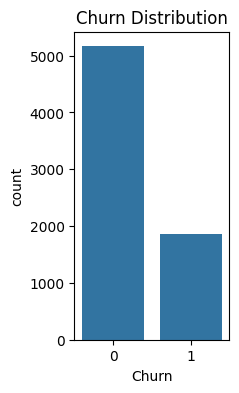

In [58]:
plt.figure(figsize=(2,4))
sns.countplot(data=eda_data, x='Churn')
plt.title('Churn Distribution')
plt.show()

In [59]:
num_cols = ['tenure', 'MonthlyCharges','TotalCharges']

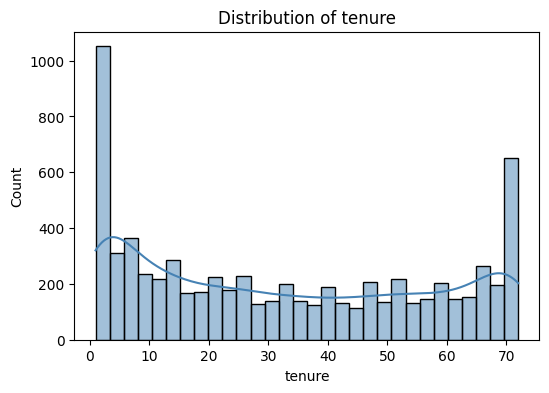

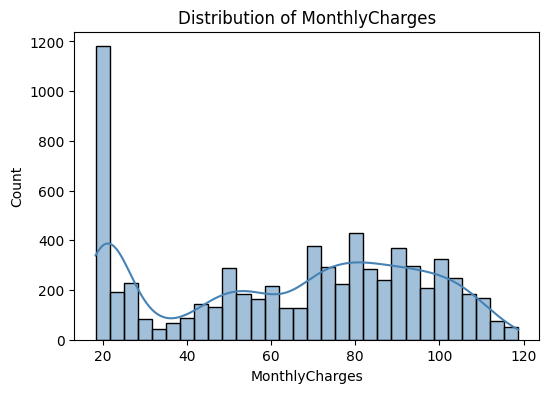

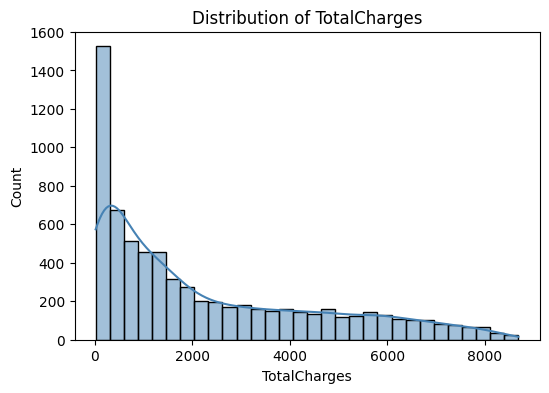

In [63]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(eda_data[col], kde=True, bins=30, color='steelblue')
    plt.title(f"Distribution of {col}")
    plt.show()

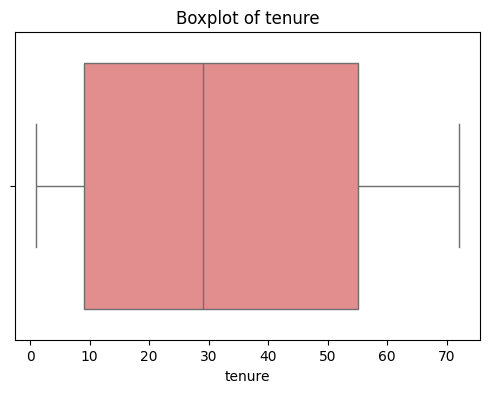

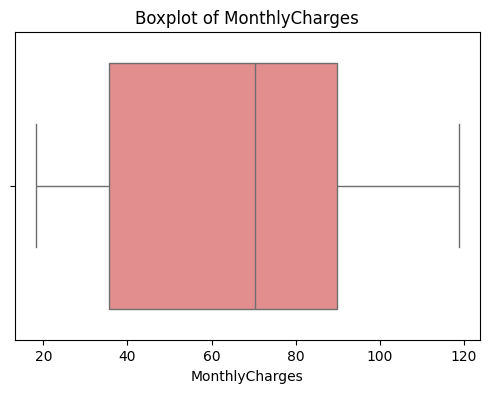

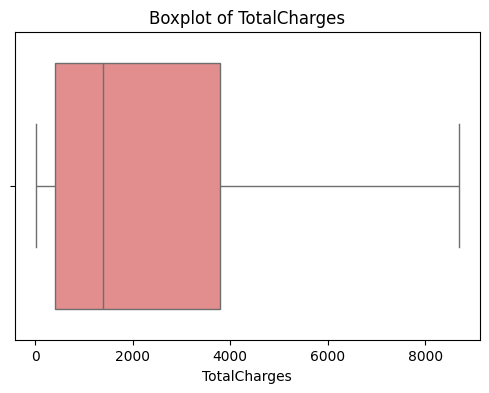

In [62]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=eda_data[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
    plt.show()

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


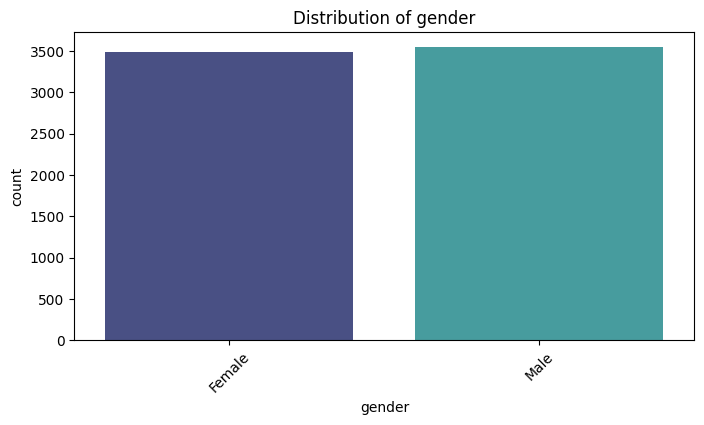

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


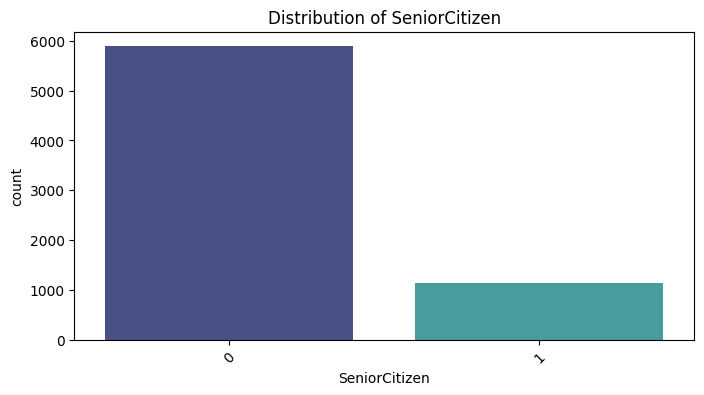

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


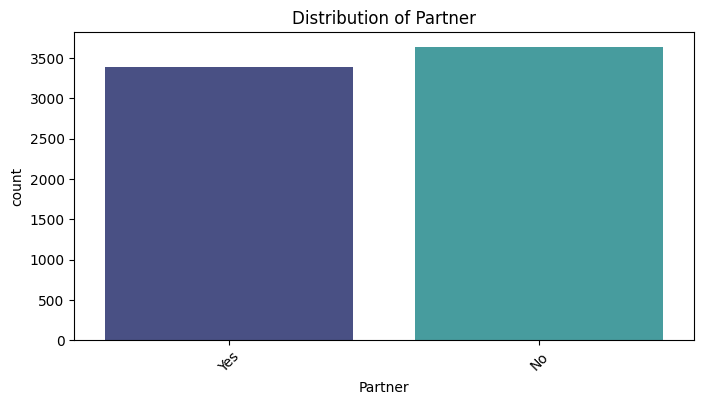

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


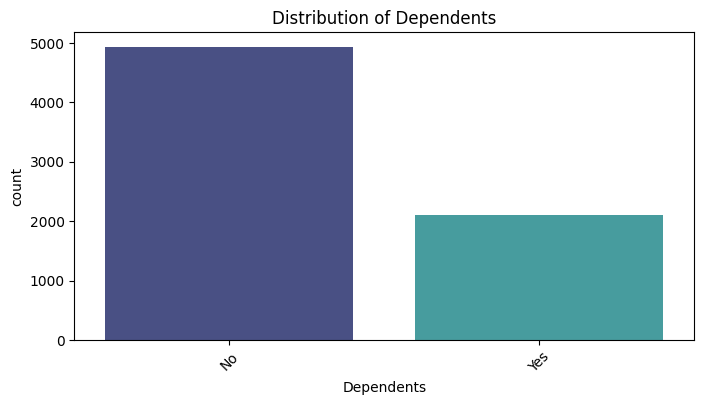

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


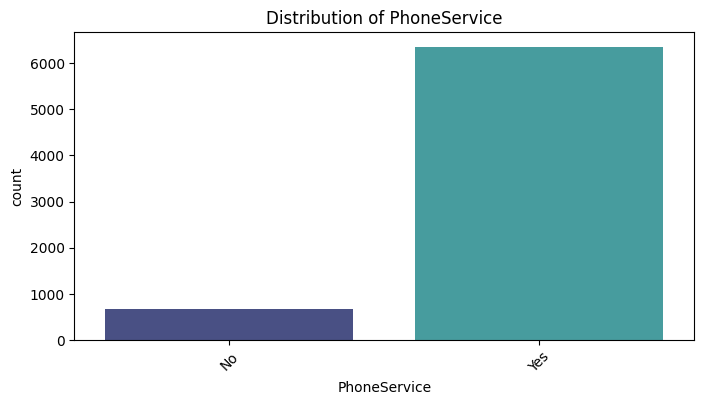

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


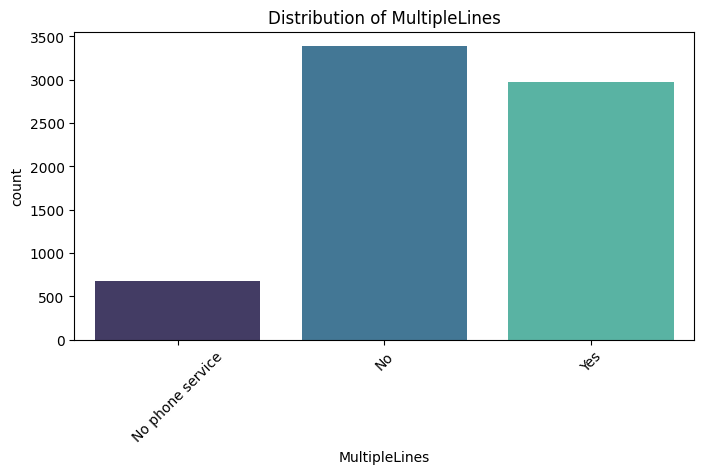

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


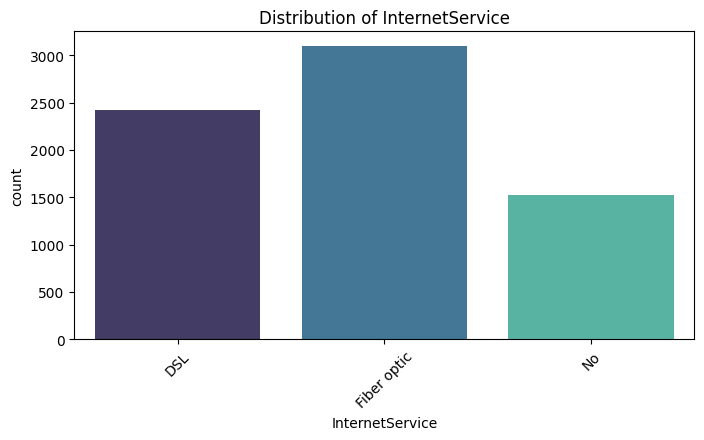

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


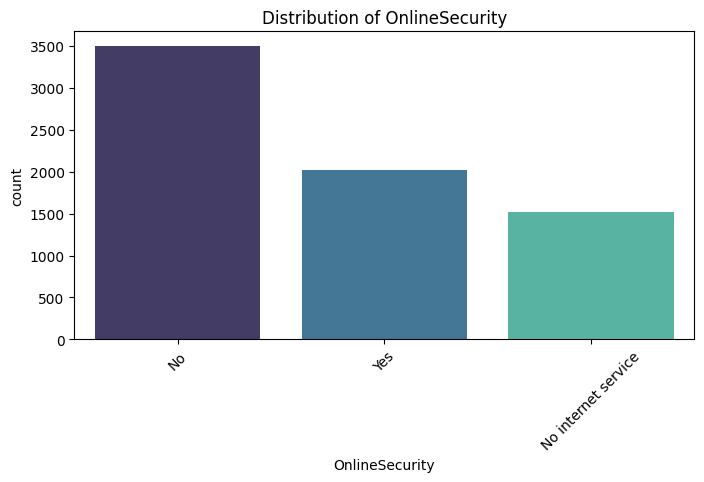

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


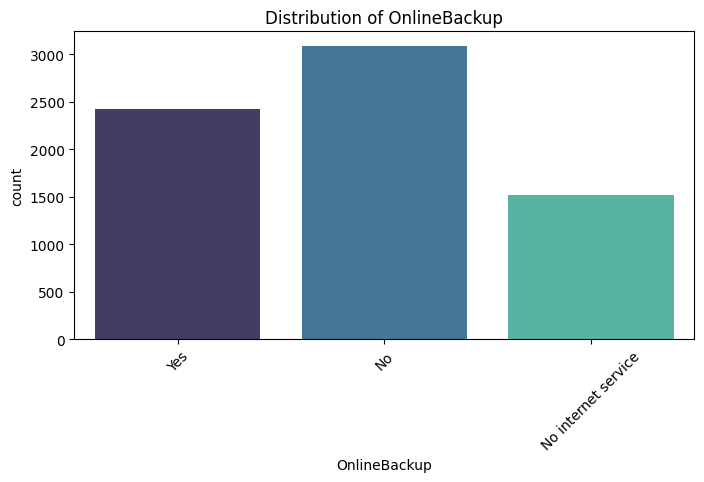

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


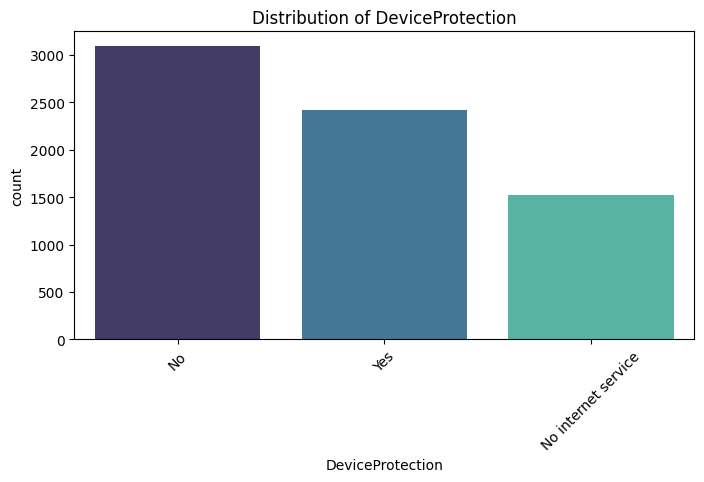

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


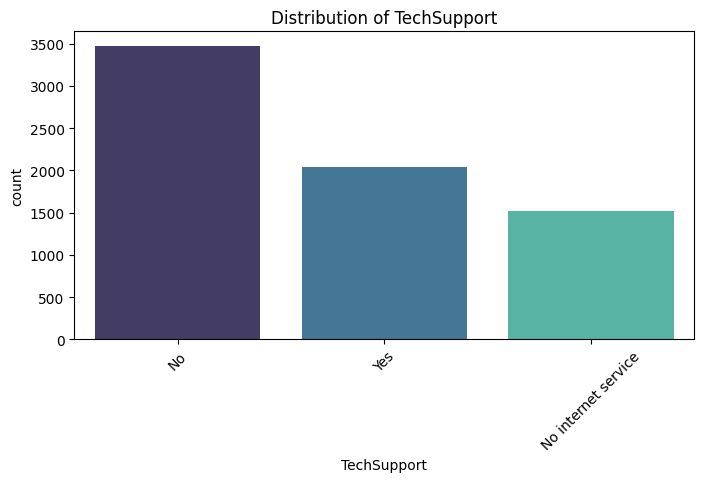

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


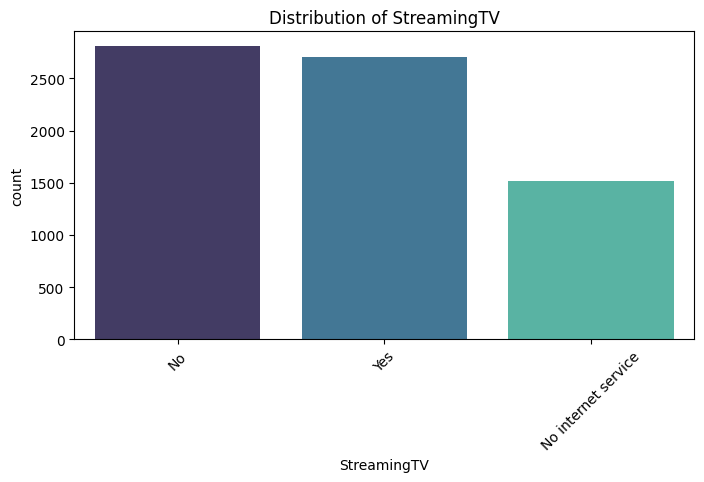

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


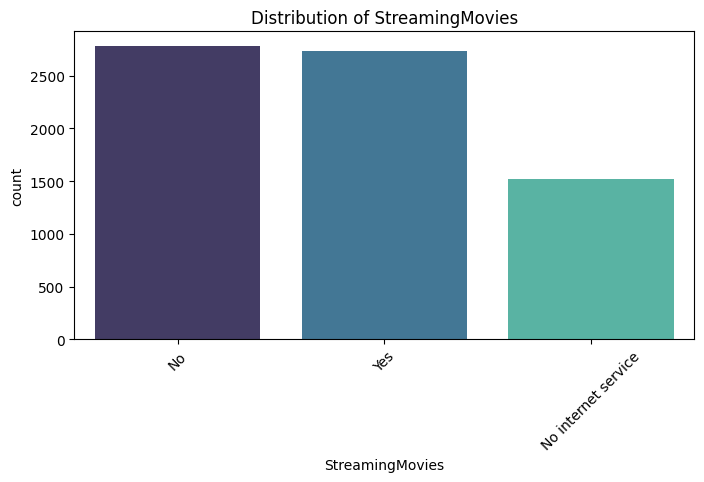

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


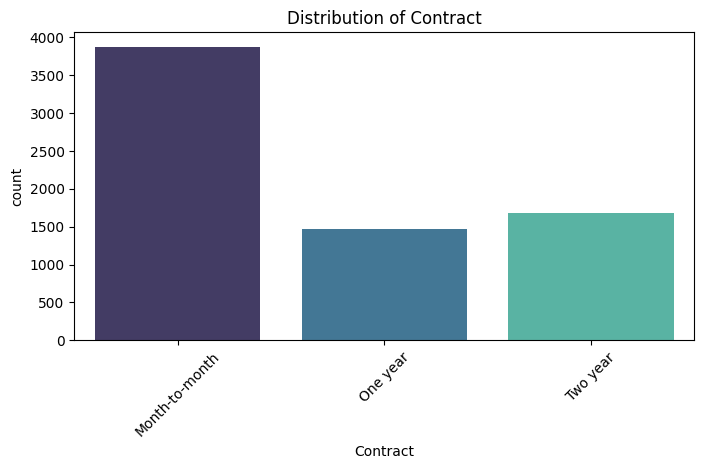

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


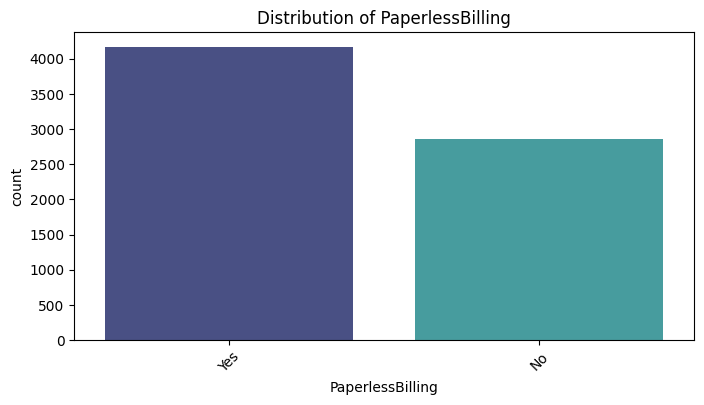

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


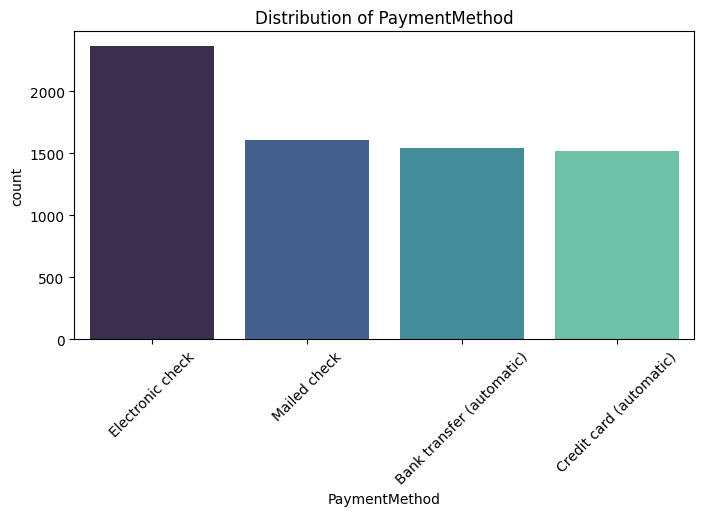

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


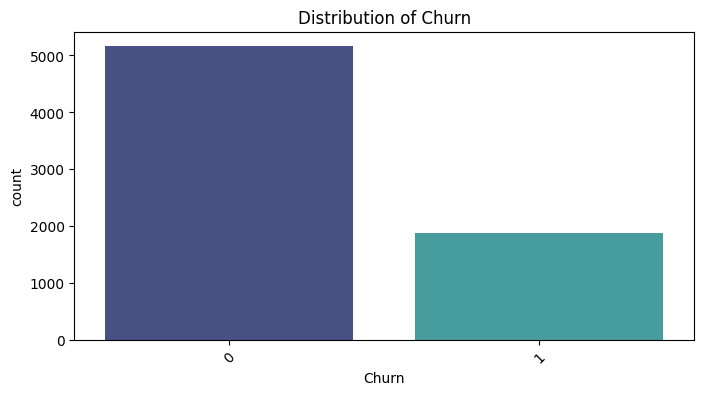

In [61]:
for col in datacopy:
    plt.figure(figsize=(8,4))
    sns.countplot(data=eda_data, x=col, palette='mako')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


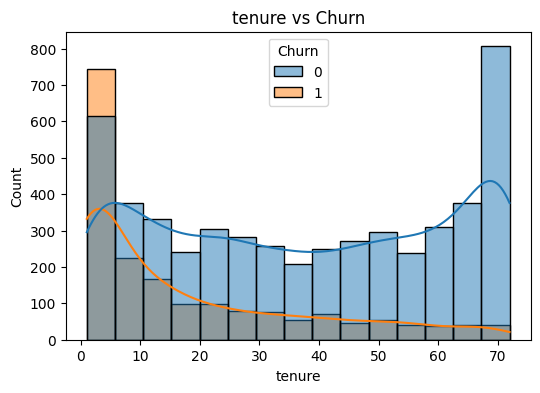

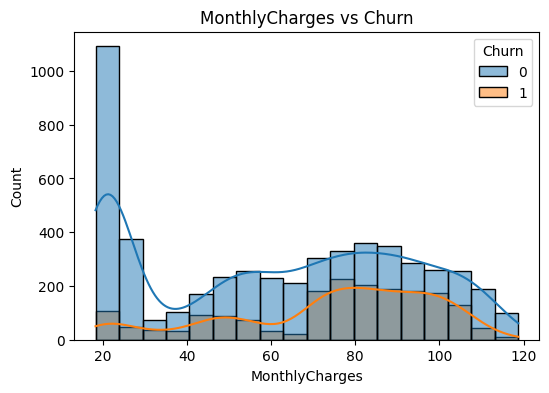

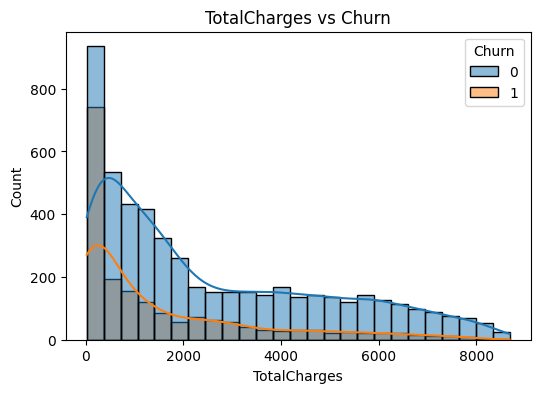

In [64]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=eda_data, x=col, hue='Churn', kde=True)
    plt.title(f"{col} vs Churn")
    plt.show()


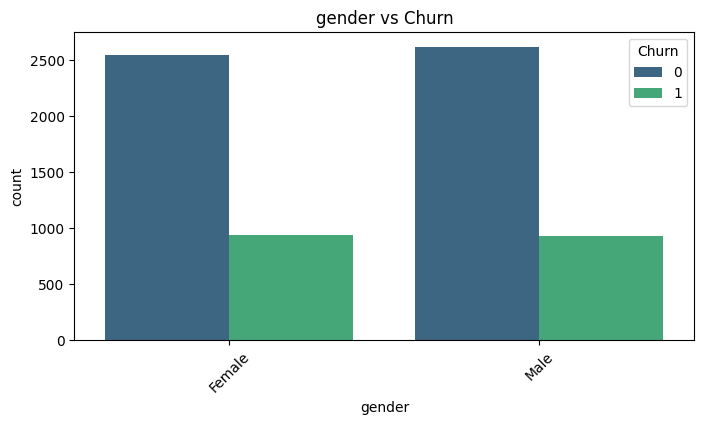

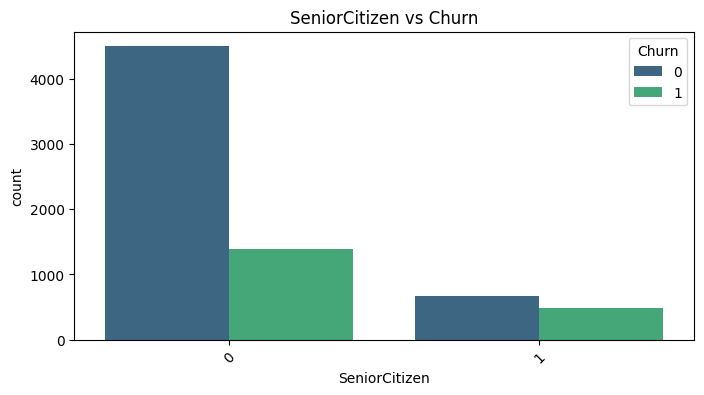

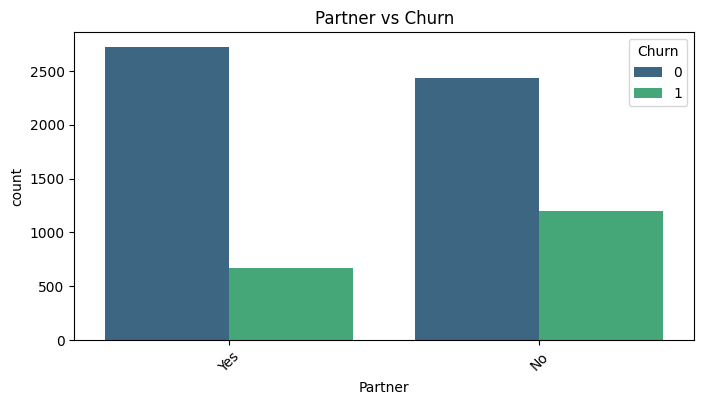

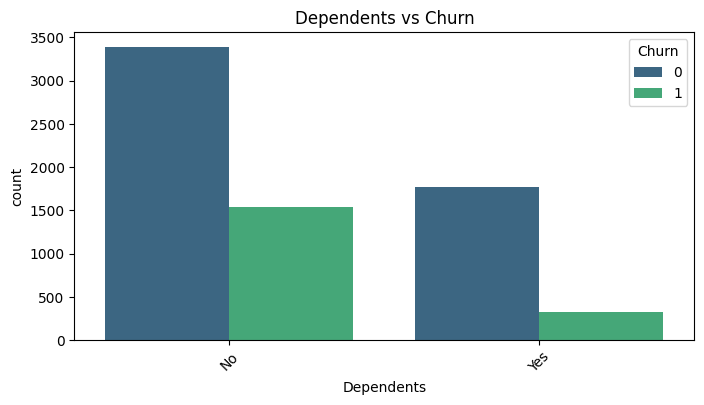

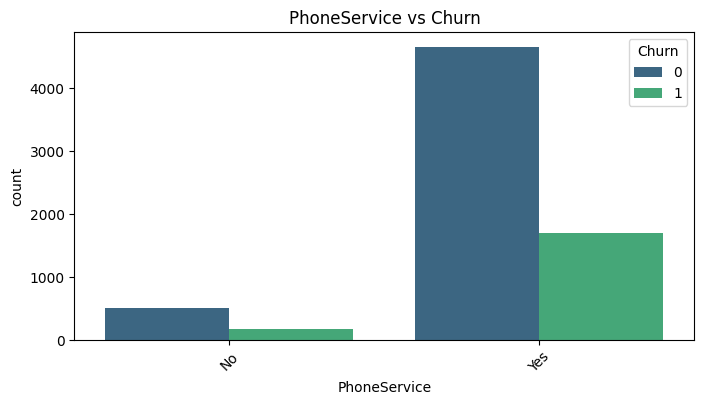

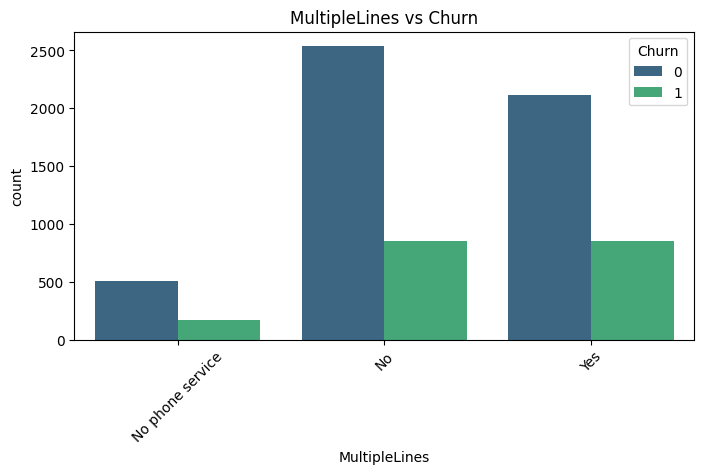

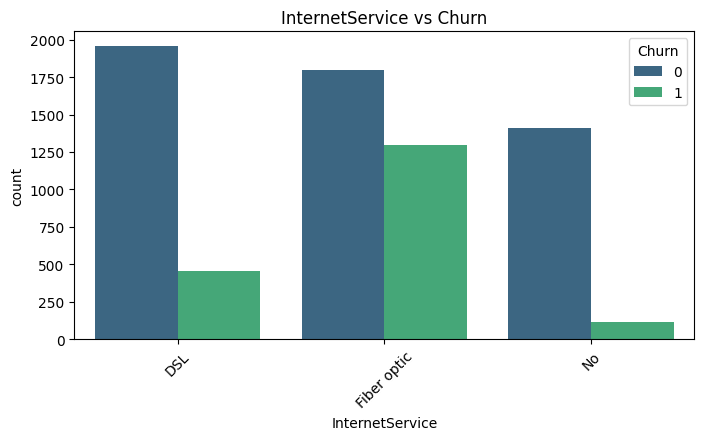

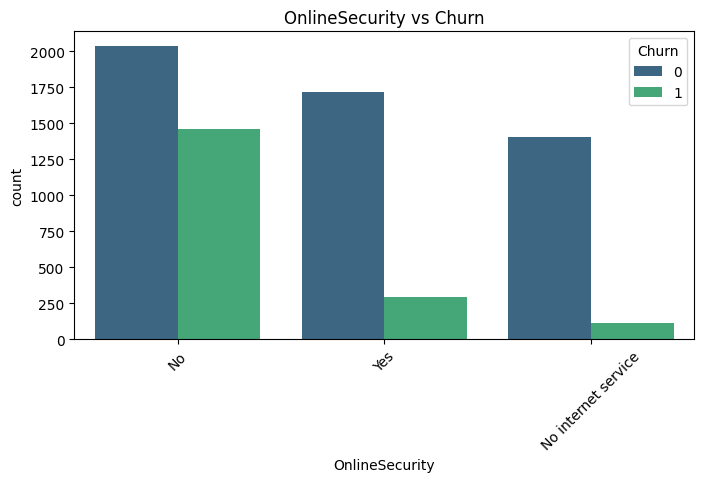

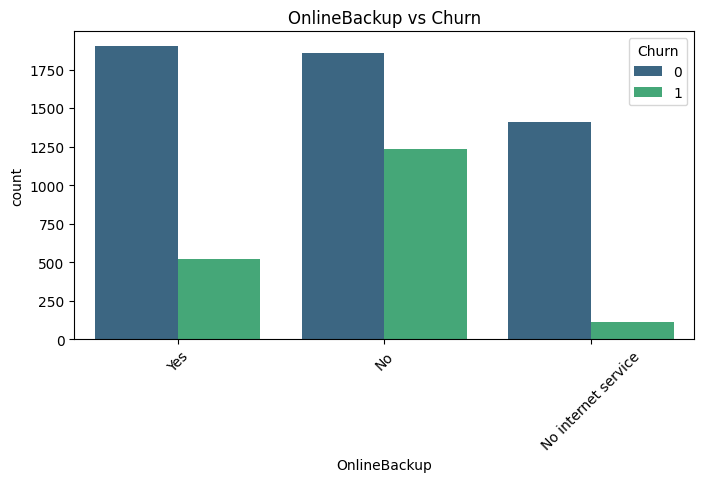

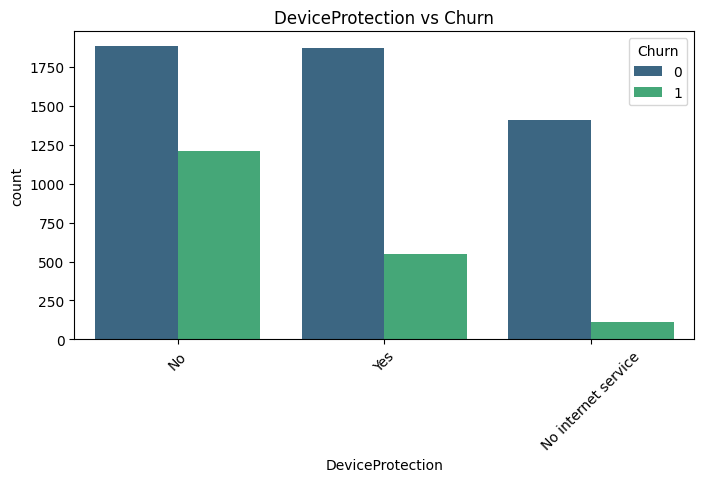

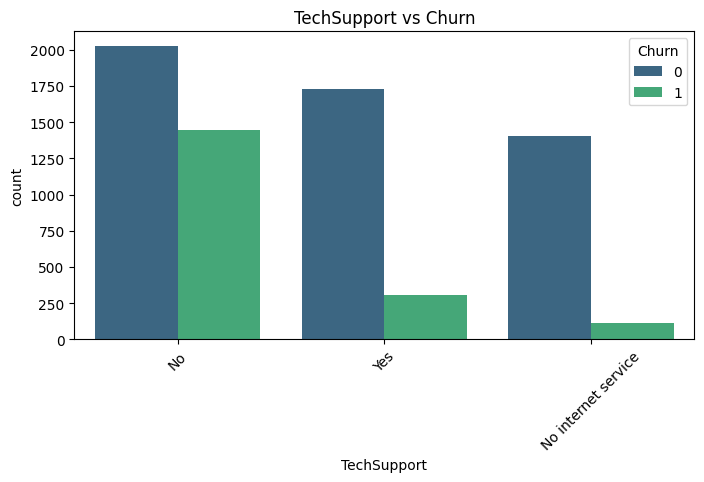

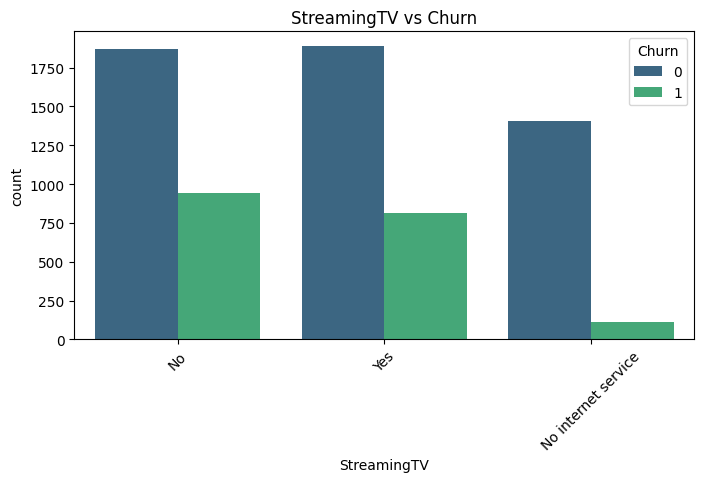

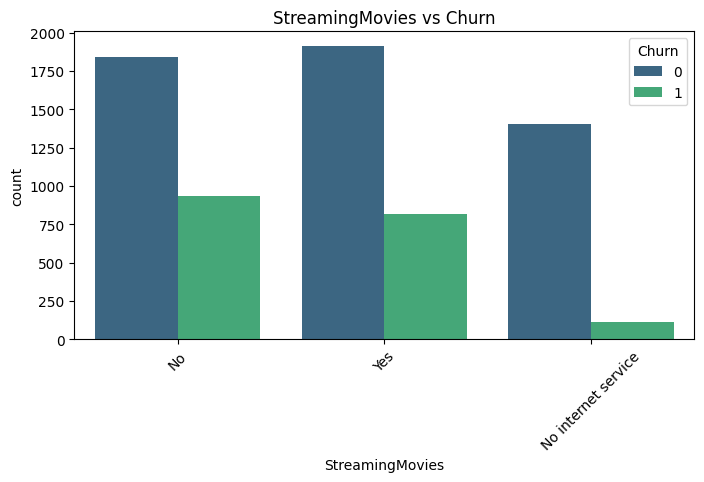

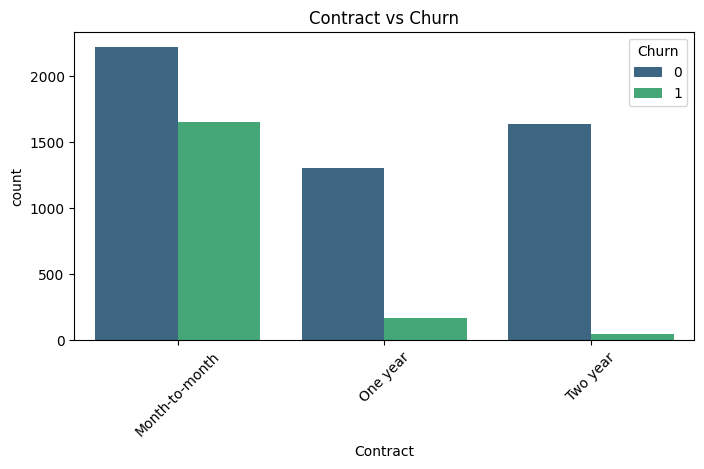

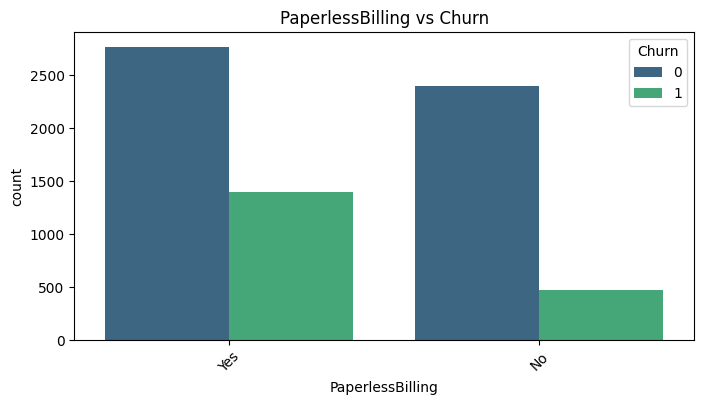

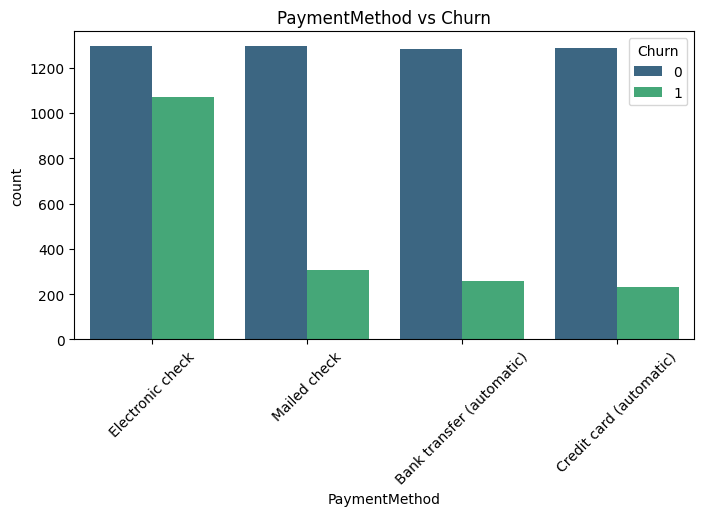

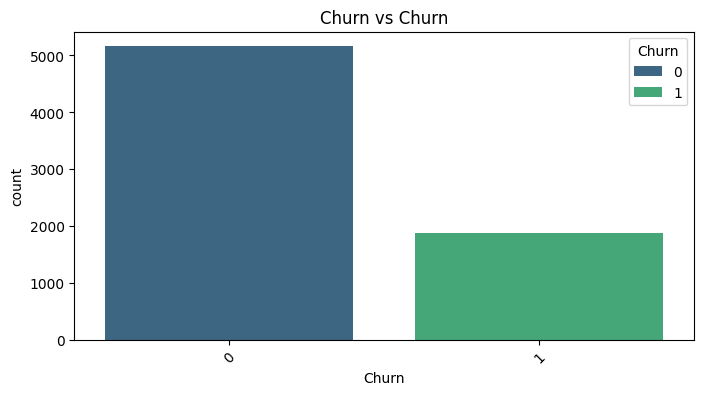

In [65]:
for col in datacopy:
    plt.figure(figsize=(8,4))
    sns.countplot(data=eda_data, x=col, hue='Churn', palette='viridis')
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()


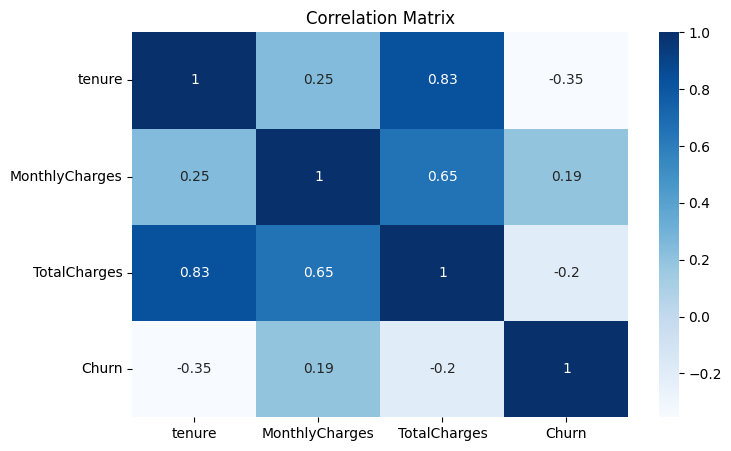

In [67]:
plt.figure(figsize=(8,5))
sns.heatmap(eda_data[num_cols + ['Churn']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()


# **PreProcessing**

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [70]:
# Convert TotalCharges to numeric
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')

# Check missing values created by conversion
print("Missing TotalCharges after conversion:", telco_data['TotalCharges'].isna().sum())

# Drop rows with missing TotalCharges
telco_data = telco_data.dropna(subset=['TotalCharges']).reset_index(drop=True)


Missing TotalCharges after conversion: 0


In [77]:
#converting target variable to numeric in the main dataset
telco_data['Churn'] = telco_data['Churn'].map({'Yes': 1, 'No': 0})

In [78]:
telco_data = telco_data.drop(columns=['customerID'])

In [79]:
# Select categorical columns
cat_cols = telco_data.select_dtypes(include=['object']).columns

# One-hot encode
telco_data = pd.get_dummies(telco_data, columns=cat_cols, drop_first=True)


# **Feature engineering**

In [86]:
telco_data['TenureGroup'] = pd.cut(
    telco_data['tenure'],
    bins=[0, 12, 24, 48, 60, 100],
    labels=['0-12', '12-24', '24-48', '48-60', '60+']
)

In [90]:
telco_data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'TenureGroup'],
      dtype='object')

In [92]:
service_yes_cols = [
    'PhoneService_Yes',
    'MultipleLines_Yes',
    'OnlineSecurity_Yes',
    'OnlineBackup_Yes',
    'DeviceProtection_Yes',
    'TechSupport_Yes',
    'StreamingTV_Yes',
    'StreamingMovies_Yes',
    'InternetService_Fiber optic'
]

telco_data['TotalServices'] = telco_data[service_yes_cols].sum(axis=1)


In [94]:
telco_data['HasFiber'] = telco_data['InternetService_Fiber optic']


In [95]:
telco_data['ContractRisk'] = (
    3 * (1 - telco_data['Contract_One year'] - telco_data['Contract_Two year']) +  # Month-to-month
    2 * telco_data['Contract_One year'] +                                          # One year
    1 * telco_data['Contract_Two year']                                            # Two year
)


In [96]:
telco_data['ChargeTenureInteraction'] = telco_data['MonthlyCharges'] * telco_data['tenure']


In [100]:
cat_cols = telco_data.select_dtypes(include=['object']).columns

if len(cat_cols) > 0:
    telco_data = pd.get_dummies(telco_data, columns=cat_cols, drop_first=True)


In [102]:
X = telco_data.drop('Churn', axis=1)
y = telco_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5625, 35)
Test shape: (1407, 35)


((5625, 35), (1407, 35))

In [85]:
# for nerual network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)